# Job Applications webscrapping

In [ ]:
#pip install beautifulsoup4

In [39]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

In [40]:
url='https://internshala.com/jobs/data-science-jobs/'

In [41]:
req=requests.get(url)

In [42]:
req

<Response [200]>

In [43]:
content=BeautifulSoup(req.content,'html.parser')
print(content.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0 user-scalable=0" name="viewport"/>
  <meta content="702141670710132" property="fb:app_id"/>
  <meta content="website" property="og:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="@Internshala" name="twitter:site"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@internshala" name="twitter:creator"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-navbutton-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" crossorigin="" href="/static/fonts/Inter.woff2?v=3.11" type="font/woff2"/>
  <link as="font" crossorigin="" href="/

In [44]:
# jobs 

In [45]:
jobs=content.find_all('div',{'class':'company'})

In [46]:
print(jobs)

[<div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/data-quality-engineer-fresher-jobs-in-delhi-at-the-agency-source1687953806">Data Quality Engineer</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-the-agency-source">
                        The Agency Source                    </a>
</h4>
</div>, <div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/associate-business-analyst-fresher-jobs-in-bangalore-at-dpdzero1687938741">Associate Business Analyst</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-dpdzero">
                        DPDzero                    </a>
</h4>
</div>, <div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/business-analyst-fresher-jobs-in-delhi-at-trehan-internati

In [47]:
print(len(jobs))

40


In [48]:
job=jobs[0]

In [49]:
job

<div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/data-quality-engineer-fresher-jobs-in-delhi-at-the-agency-source1687953806">Data Quality Engineer</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-the-agency-source">
                        The Agency Source                    </a>
</h4>
</div>

In [50]:
job.text

'\n\nData Quality Engineer \n\n\n                        The Agency Source                    \n\n'

In [51]:
name=content.find_all('div',{'class':'company'})
#print(name)
#print(type(name))
#name=name[0]
#name=name.text
len(name)

40

In [52]:
salary=content.find_all('div',{'class':'item_body salary'})
#print(salary)
len(salary)

40

In [53]:
experience=content.find_all('div',{'class':'item_body mobile-text'})
#print(experience)
len(experience)

40

In [54]:
Jobs=[]
Salary=[]
Experience=[]

In [55]:
for i in name:
    Jobs.append(i.text)
    
for i in salary:
    Salary.append(i.text)
    
for i in experience:
    Experience.append(i.text)  

In [56]:
data={'Jobs':Jobs,'Salary':Salary,'Experience':Experience}

In [57]:
df=pd.DataFrame(data)

In [58]:
df.head()

,Jobs,Salary,Experience
0,\n\nData Quality Engineer \n\n\n ...,\n ₹ 3 - 3.1 LPA ...,0-2 years experience
1,\n\nAssociate Business Analyst \n\n\n ...,\n ₹ 10 - 15 LPA ...,0-5 years experience
2,\n\nBusiness Analyst \n\n\n ...,\n ₹ 3.6 - 4.8 LPA...,0-2 years experience
3,\n\nArtificial Intelligence (AI) Executive \n\...,\n ₹ 8 - 12 LPA ...,0-5 years experience
4,\n\nData Scientist \n\n\n ...,\n ₹ 6 - 8.5 LPA ...,0-5 years experience


In [59]:
Df1=df.applymap(lambda x:x.replace('\n',''))

In [60]:
Df1.head()

,Jobs,Salary,Experience
0,Data Quality Engineer ...,₹ 3 - 3.1 LPA ...,0-2 years experience
1,Associate Business Analyst ...,₹ 10 - 15 LPA ...,0-5 years experience
2,Business Analyst Treha...,₹ 3.6 - 4.8 LPA ...,0-2 years experience
3,Artificial Intelligence (AI) Executive ...,₹ 8 - 12 LPA ...,0-5 years experience
4,Data Scientist Buddha ...,₹ 6 - 8.5 LPA ...,0-5 years experience


In [61]:
ss=r'[₹,-]'

In [62]:
Df2=Df1.applymap(lambda x:re.sub(ss,'',x))

In [63]:
Df2.head()

,Jobs,Salary,Experience
0,Data Quality Engineer ...,3 3.1 LPA ...,02 years experience
1,Associate Business Analyst ...,10 15 LPA ...,05 years experience
2,Business Analyst Treha...,3.6 4.8 LPA ...,02 years experience
3,Artificial Intelligence (AI) Executive ...,8 12 LPA ...,05 years experience
4,Data Scientist Buddha ...,6 8.5 LPA ...,05 years experience


In [64]:
Df2['Experience']=Df2['Experience'].str.replace('years experience','')
Df2['Salary']=Df2['Salary'].str.replace('LPA ...','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6640\122342500.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Df2['Salary']=Df2['Salary'].str.replace('LPA ...','')


In [65]:
pattern = r'(\d+(?:\.\d+)?)'

In [66]:
Df2[['Min_Salary', 'Max_Salary']] = Df2['Salary'].str.extractall(pattern).unstack()

In [67]:
Df2.head()

,Jobs,Salary,Experience,Min_Salary,Max_Salary
0,Data Quality Engineer ...,3 3.1 ...,02,3,3.1
1,Associate Business Analyst ...,10 15 ...,05,10,15
2,Business Analyst Treha...,3.6 4.8 ...,02,3.6,4.8
3,Artificial Intelligence (AI) Executive ...,8 12 ...,05,8,12
4,Data Scientist Buddha ...,6 8.5 ...,05,6,8.5


In [68]:
Df2.isnull().sum()

Jobs          0
Salary        0
Experience    0
Min_Salary    0
Max_Salary    7
dtype: int64

In [69]:
Df2['Max_Salary']=Df2['Max_Salary'].bfill()

In [70]:
Df2['Salary']=Df2['Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [71]:
Df2['Avg_Salary']=Df2['Salary'].apply(lambda x:sum(x)/len(x))

In [72]:
Df2=Df2.drop('Salary',axis=1)

In [73]:
Df2.head()

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Quality Engineer ...,02,3,3.1,3.05
1,Associate Business Analyst ...,05,10,15,12.50
2,Business Analyst Treha...,02,3.6,4.8,4.20
3,Artificial Intelligence (AI) Executive ...,05,8,12,10.00
4,Data Scientist Buddha ...,05,6,8.5,7.25


In [74]:
Df2['Min_Salary']=Df2['Min_Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [75]:
Df2['Min_Salary']=Df2['Min_Salary'].apply(lambda x:sum(x)/len(x))

In [76]:
Df2.head()

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Quality Engineer ...,02,3.0,3.1,3.05
1,Associate Business Analyst ...,05,10.0,15,12.50
2,Business Analyst Treha...,02,3.6,4.8,4.20
3,Artificial Intelligence (AI) Executive ...,05,8.0,12,10.00
4,Data Scientist Buddha ...,05,6.0,8.5,7.25


In [77]:
Df2['Max_Salary']=Df2['Max_Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [78]:
Df2['Max_Salary']=Df2['Max_Salary'].apply(lambda x:sum(x)/len(x))

In [79]:
Df2

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Quality Engineer ...,02,3.00,3.10,3.05
1,Associate Business Analyst ...,05,10.00,15.00,12.50
2,Business Analyst Treha...,02,3.60,4.80,4.20
3,Artificial Intelligence (AI) Executive ...,05,8.00,12.00,10.00
4,Data Scientist Buddha ...,05,6.00,8.50,7.25
5,Data Scientist Shubh I...,05,9.00,10.00,9.50
6,Data Analyst Primary H...,02,2.00,4.00,2.00
7,Research Analyst Jade ...,02,2.00,4.00,2.00
8,Research Assistant Ind...,02,3.00,4.00,3.50
9,Business Analyst Vumon...,02,2.40,3.00,2.70


# Data Scientist Jobs

In [80]:
DS=Df2[Df2.Jobs.str.contains('Data Scientist',case=False)]

In [81]:
DS

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
4,Data Scientist Buddha ...,05,6.0,8.5,7.25
5,Data Scientist Shubh I...,05,9.0,10.0,9.50
12,Behavioral Data Scientist ...,05,3.0,5.0,4.00
18,Associate Data Scientist ...,05,4.0,6.0,5.00
22,Data Scientist BlobCit...,02,3.6,9.0,3.60
23,Data Scientist Areete ...,02,3.0,9.0,3.00


In [82]:
import matplotlib.pyplot as plt

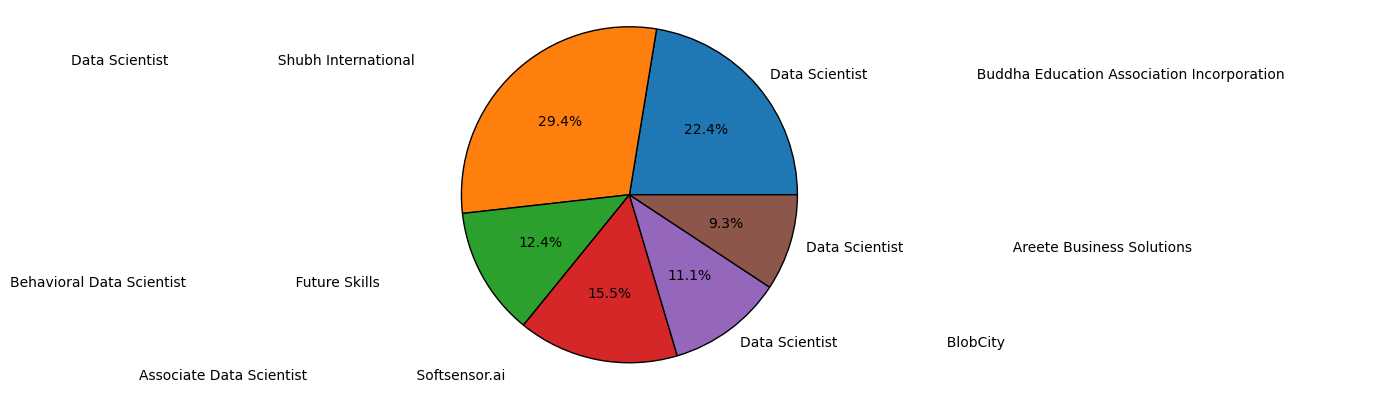

In [83]:
plt.pie(DS['Avg_Salary'],labels=DS['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()

# Data Analyst Jobs

In [84]:
DA=Df2[Df2.Jobs.str.contains('Analyst',case=False)]

In [85]:
DA

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
1,Associate Business Analyst ...,05,10.0,15.0,12.5
2,Business Analyst Treha...,02,3.6,4.8,4.2
6,Data Analyst Primary H...,02,2.0,4.0,2.0
7,Research Analyst Jade ...,02,2.0,4.0,2.0
9,Business Analyst Vumon...,02,2.4,3.0,2.7
11,Business Analyst Futur...,05,3.0,5.0,4.0
15,Business Analyst Arth ...,02,2.0,3.0,2.5
16,Junior Business Analyst ...,05,5.0,7.0,6.0
17,Executive Analyst & Operations ...,02,2.0,4.0,3.0
24,Financial Data Analyst ...,02,3.6,9.0,3.6


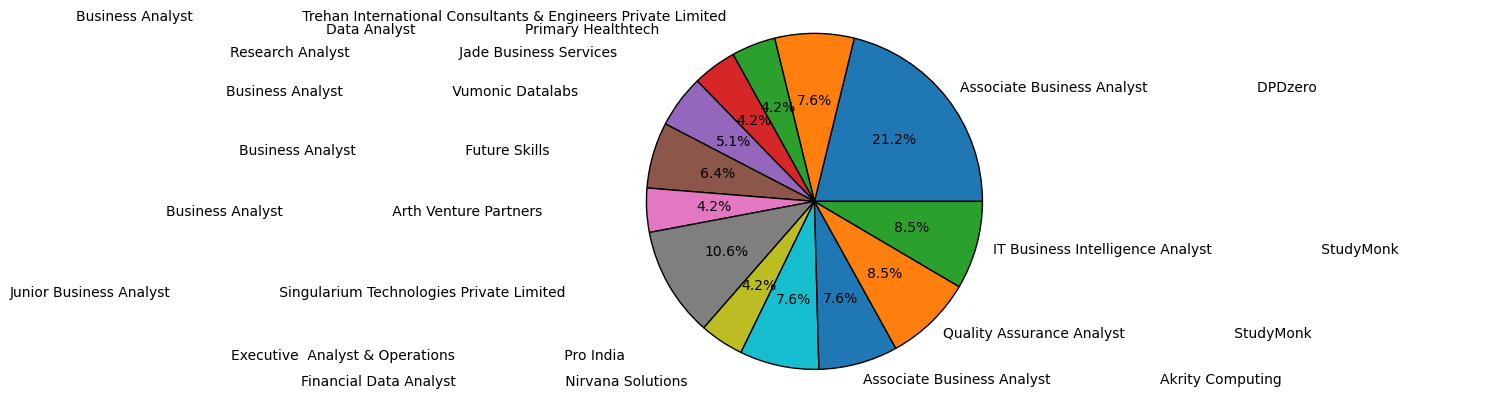

In [86]:
plt.pie(DA['Min_Salary'],labels=DA['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()

# ML Jobs

In [87]:
ML=Df2[Df2.Jobs.str.contains('Engineer',case=False)]

In [88]:
ML

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Quality Engineer ...,02,3.0,3.1,3.05
2,Business Analyst Treha...,02,3.6,4.8,4.20
10,Computer Vision & NLP AI Engineer (Fresher/Ex...,05,5.0,5.0,5.00
13,Machine Learning Engineer ...,05,10.0,55.0,32.50
14,Machine Learning Engineer ...,02,3.0,4.0,3.50
27,Technical Research Engineer ...,02,2.0,2.2,2.10
30,Machine Learning Engineer ...,05,3.6,5.0,4.30
32,Python (AI/ML) Engineer ...,02,2.0,4.0,3.00
39,Data Engineer StudyMon...,05,4.0,6.0,5.00


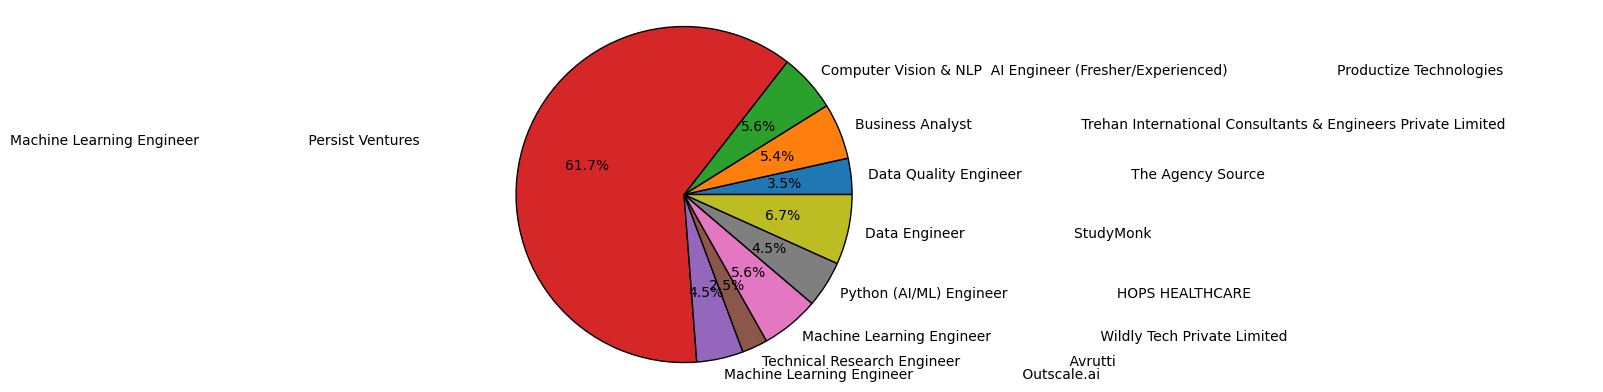

In [89]:
plt.pie(ML['Max_Salary'],labels=ML['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()

# Machine Learning Model

In [98]:
Df3=Df2

In [99]:
Df3

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Quality Engineer ...,02,3.00,3.10,3.05
1,Associate Business Analyst ...,05,10.00,15.00,12.50
2,Business Analyst Treha...,02,3.60,4.80,4.20
3,Artificial Intelligence (AI) Executive ...,05,8.00,12.00,10.00
4,Data Scientist Buddha ...,05,6.00,8.50,7.25
5,Data Scientist Shubh I...,05,9.00,10.00,9.50
6,Data Analyst Primary H...,02,2.00,4.00,2.00
7,Research Analyst Jade ...,02,2.00,4.00,2.00
8,Research Assistant Ind...,02,3.00,4.00,3.50
9,Business Analyst Vumon...,02,2.40,3.00,2.70


In [95]:
Df3.dtypes

Jobs           object
Experience     object
Min_Salary    float64
Max_Salary    float64
Avg_Salary    float64
dtype: object

In [135]:
x=Df3[['Experience']]
y=Df3['Avg_Salary']

In [136]:
from sklearn.model_selection import train_test_split

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [149]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [150]:
y_predict=model.predict(x_test)

In [151]:
y_predict

array([7.98666667, 7.98666667, 3.04117647, 3.04117647, 7.98666667,
       7.98666667, 3.04117647, 3.04117647])

In [156]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.12302838236188618


In [154]:
from sklearn import metrics
r_square=metrics.r2_score(y_test,y_predict)
print('R-Square Error:',r_square)

R-Square Error: 0.12302838236188618
